## Estimator of the Cumulative Distribution Function

[Reference](http://www.stodolkiewicz.com/2019/11/23/empirical-cumulative-distribution-function-ecdf-in-python/)

In [1]:
%config InlineBackend.figure_format = 'retina'

from sklearn.datasets import load_iris

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.rcParams['figure.figsize'] = (8, 6)

In [2]:
## Load Data 
data = load_iris()

## Create DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target
df['species'] = df['species'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])

## Shape
df.shape

(150, 5)

In [3]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
## Number of unique values per column
df[df.columns].nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
species               3
dtype: int64

In [5]:
## Unique values
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
## Setosa DataFrame
dfSet=df[df['species']=='setosa']
dfSet.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [7]:
## Versicolor DataFrame
dfVer=df[df['species']=='versicolor']
dfVer.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor


In [8]:
## Virginica DataFrame
dfVir=df[df['species']=='virginica']
dfVir.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica


### 1. Histogram

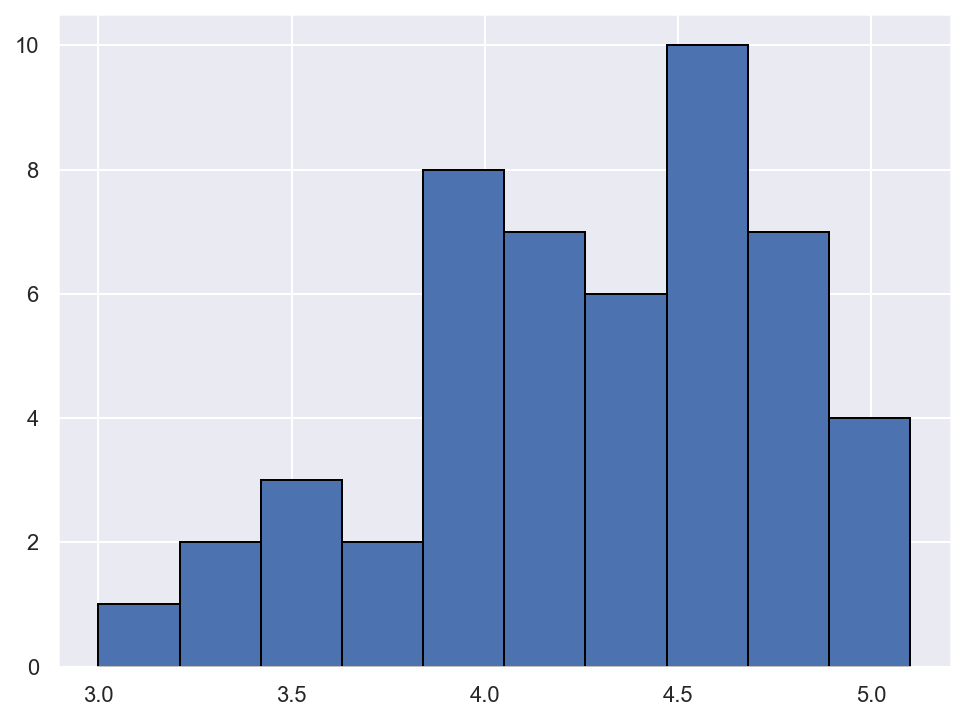

In [9]:
## Histogram
plt.hist(dfVer['petal length (cm)'], ec='black');

#### 1-1. Axis labels

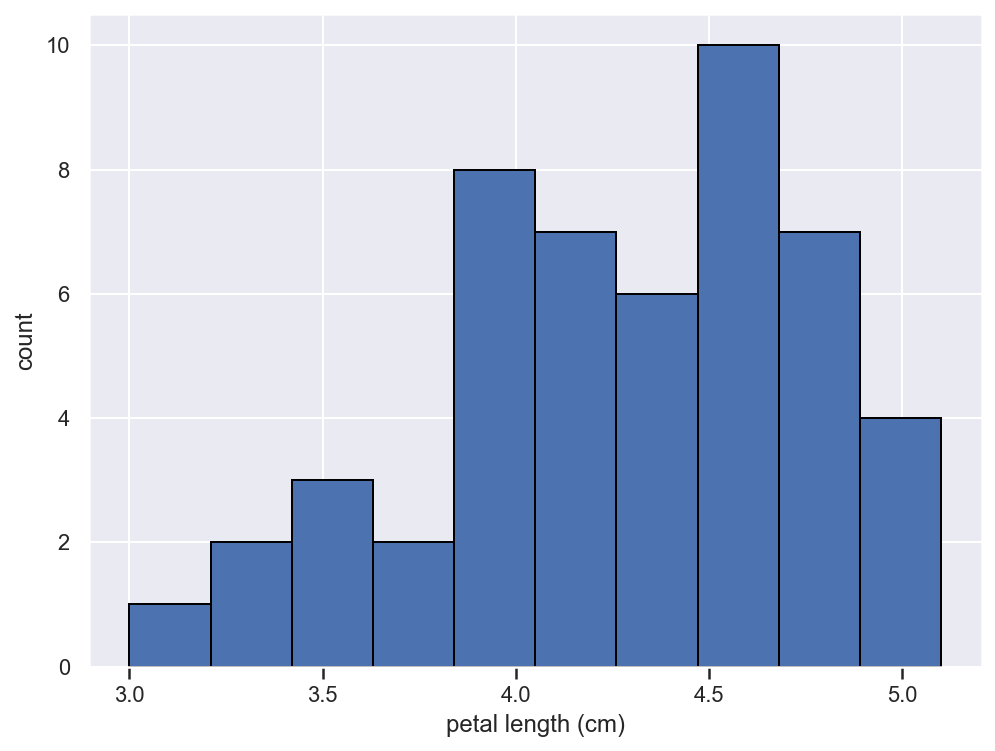

In [10]:
## Histogram of versicolor petal lengths
plt.hist(dfVer['petal length (cm)'], ec='black')

## Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

## Display respective ticks
plt.tick_params(left=False, bottom=True);

#### 1-2. Adjusting the number of bins in a histogram

- `The most important parameter of a histogram is the bin width`

In [11]:
## Lowest value 
dfVer['petal length (cm)'].min()

3.0

In [12]:
## Highest value 
dfVer['petal length (cm)'].max()

5.1

In [13]:
## Number of data points
n = len(dfVer)

## Number of bins = square root of data points (n)
nBins = np.sqrt(n)

## Convert the number of bins to int
nBins = int(nBins)

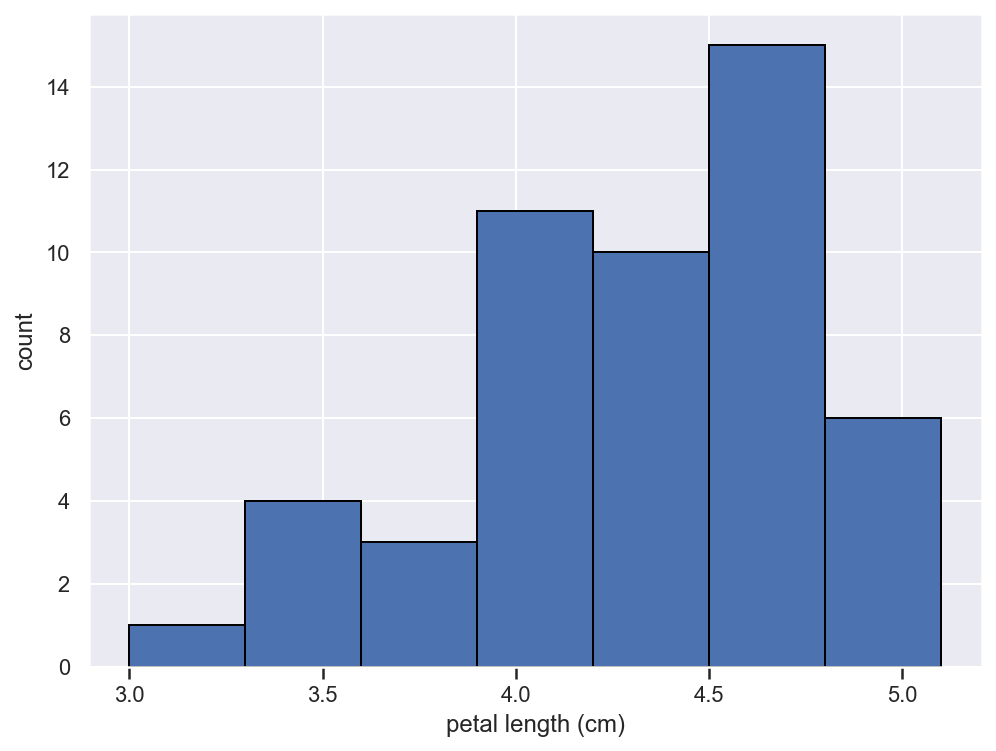

In [14]:
## Histogram of versicolor petal lengths (with bins)
plt.hist(dfVer['petal length (cm)'], ec='black', bins=nBins)

## Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

## Display respective ticks
plt.tick_params(left=False, bottom=True);

### 2. Swarmplot

In [15]:
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa


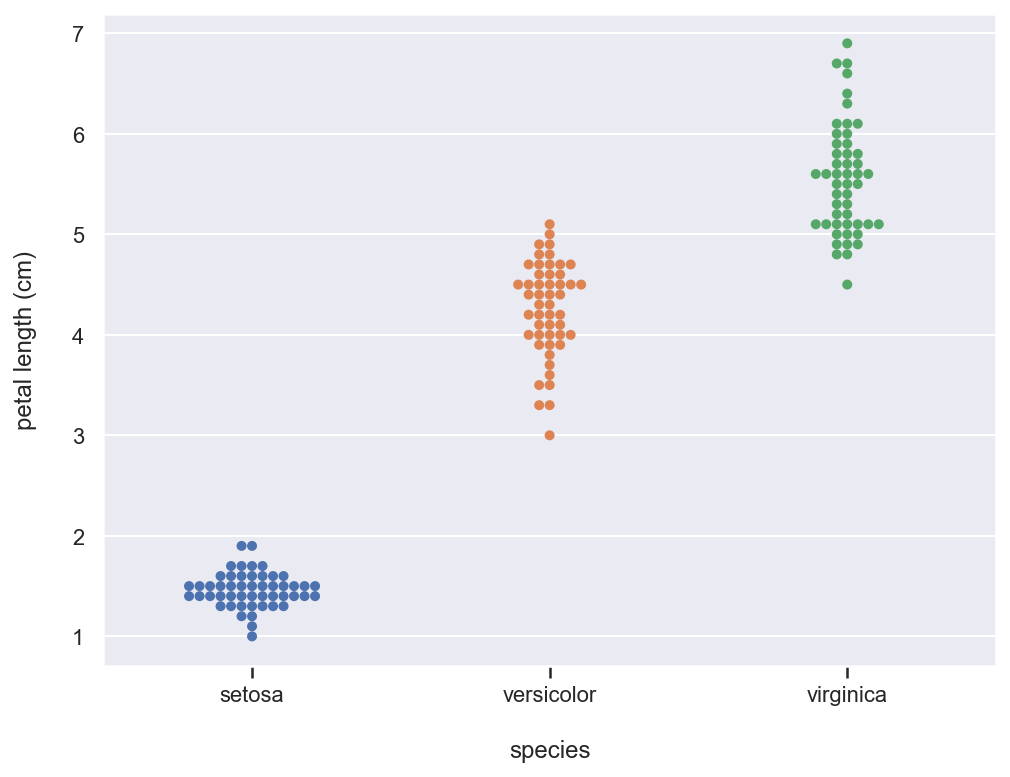

In [16]:
## Swarmplot
sns.swarmplot(data=df, x='species', y='petal length (cm)', size=5)

plt.xlabel('\nspecies')
plt.ylabel('petal length (cm)\n')

plt.tick_params(left=False, bottom=True);

### 3. ECDF

In [17]:
## Funciton
def ecdf(data):
    '''Computes ECDF for a one-dimensional array'''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

In [18]:
## Step 1.
data = dfVer['petal length (cm)']
len(data)

50

In [19]:
## Step 2.
np.sort(data)

array([3. , 3.3, 3.3, 3.5, 3.5, 3.6, 3.7, 3.8, 3.9, 3.9, 3.9, 4. , 4. ,
       4. , 4. , 4. , 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4,
       4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6,
       4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.9, 4.9, 5. , 5.1])

In [20]:
## Step 3.
np.arange(1, 50+1) / 50

array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

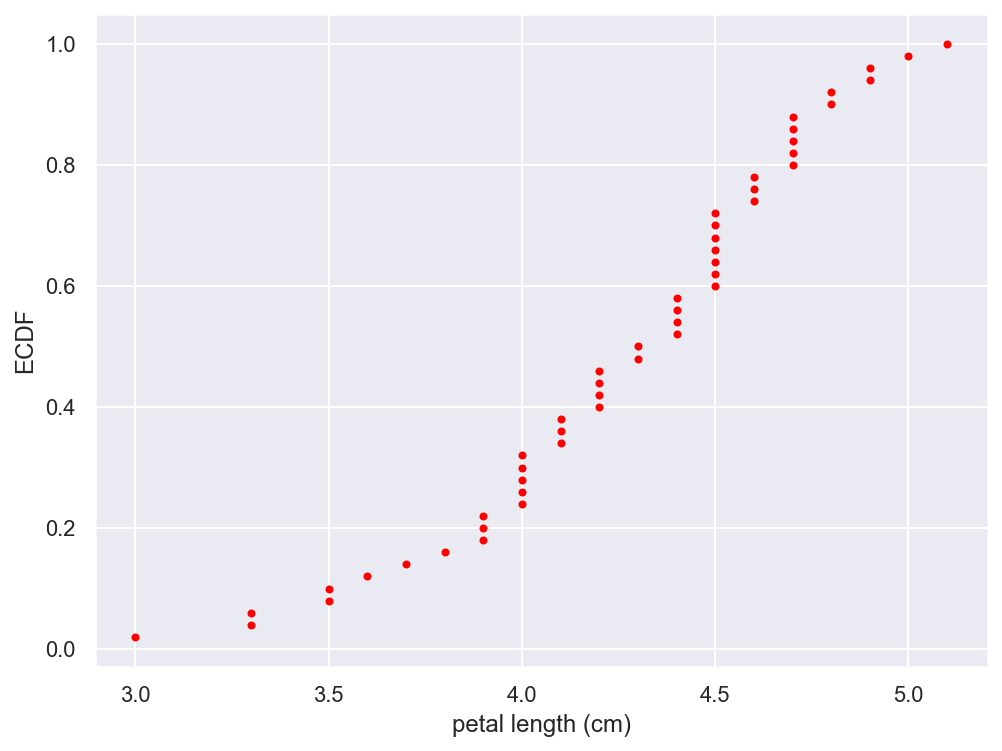

In [21]:
## Step 4.
plt.plot(np.sort(data), np.arange(1, 50+1) / 50, marker='.', linestyle='none', color='red')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')
plt.show()

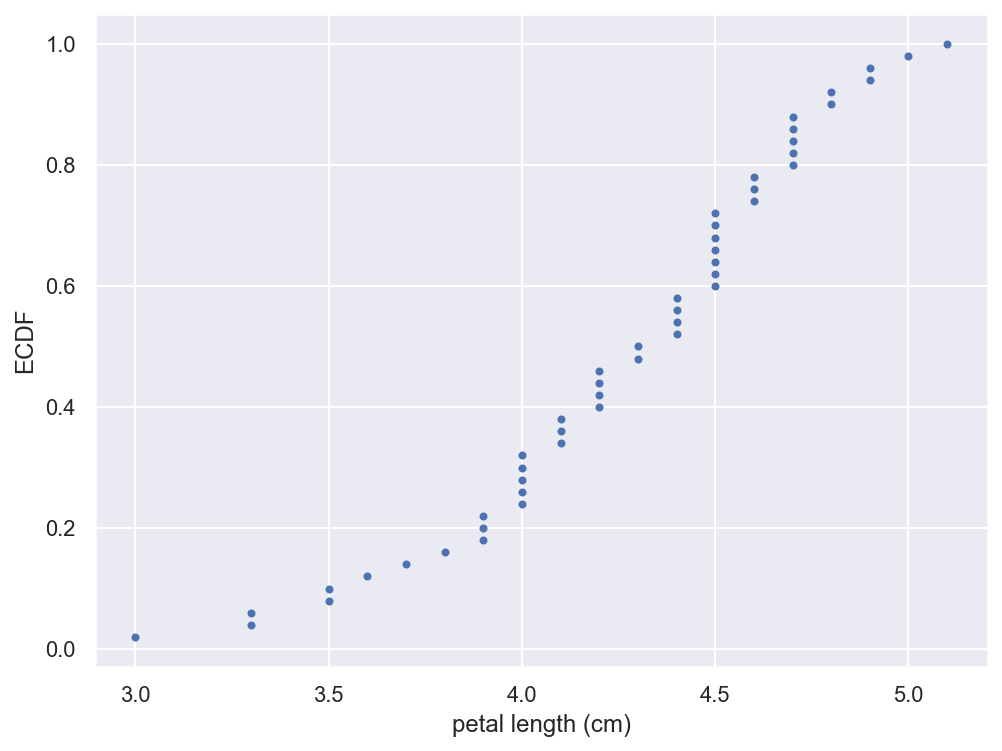

In [22]:
## All steps together
x, y = ecdf(dfVer['petal length (cm)'])
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')
plt.show()

In [23]:
## Isolate petal length for each species
setosaPetalLength = dfSet['petal length (cm)']
versicolorPetalLength = dfVer['petal length (cm)']
virginicaPetalLength = dfVir['petal length (cm)']

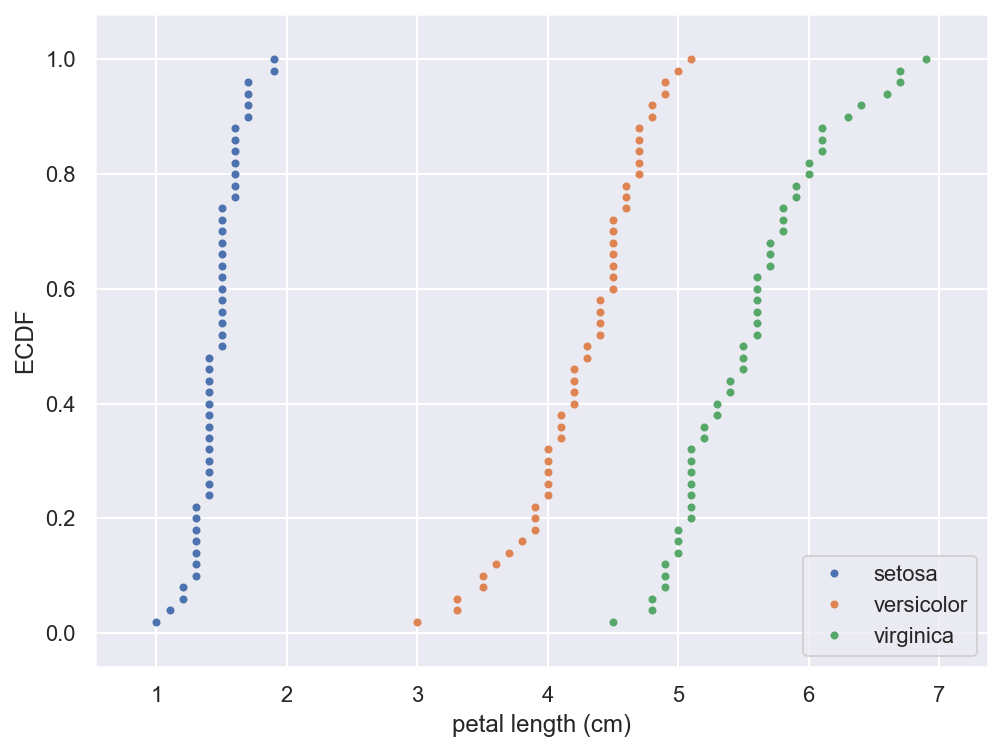

In [24]:
## Compute ECDFs for each 1D array (Feature)
xSet, ySet = ecdf(setosaPetalLength)
xVer, yVer = ecdf(versicolorPetalLength)
xVir, yVir = ecdf(virginicaPetalLength)

## Plot ECDFs
plt.plot(xSet, ySet, marker='.', linestyle='none')
plt.plot(xVer, yVer, marker='.', linestyle='none')
plt.plot(xVir, yVir, marker='.', linestyle='none')

## Annotate
plt.legend(('setosa', 'versicolor', 'virginica'), loc=0)
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

## Keep data off plot edges
plt.margins(0.08);

#### Rough code

In [25]:
## Load data & create DataFrame
def iris_data(): 
    iris = load_iris()     
    data = np.c_[iris.data, iris.target]
    columns = np.append(iris.feature_names, ['species'])
    return pd.DataFrame(data, columns=columns)

df=iris_data()
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
